In [2]:
import data_extraction
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [3]:
# retrieve data for 500 m radius around West Lafayette for walking
coords = (40.4259, -86.9081)
radius = 2000
network_type = "walk"

In [4]:
graph = data_extraction.get_graph(coords, radius, network_type)
nodes, edges = data_extraction.convert_graph(graph)

In [5]:
nodes.head(10)

,y,x,street_count,highway,geometry
osmid,,,,,
37968547,40.422079,-86.915005,4,NaN,POINT (-86.915 40.42208)
37968548,40.422099,-86.915996,3,NaN,POINT (-86.916 40.4221)
37968551,40.422362,-86.913771,3,NaN,POINT (-86.91377 40.42236)
37968552,40.422392,-86.914999,4,NaN,POINT (-86.915 40.42239)
37968554,40.422416,-86.915986,3,NaN,POINT (-86.91599 40.42242)
37968779,40.432783,-86.889029,3,NaN,POINT (-86.88903 40.43278)
37968782,40.432767,-86.888024,3,NaN,POINT (-86.88802 40.43277)
37968937,40.428049,-86.910395,4,traffic_signals,POINT (-86.91039 40.42805)
37968938,40.427599,-86.908145,4,NaN,POINT (-86.90814 40.4276)


In [6]:
print(nodes['x'].dtype)
print(nodes['y'].dtype)
print(nodes['street_count'].dtype)
print(nodes['highway'].dtype)

float64
float64
int64
object


In [8]:
edges.head(10)

osmid       highway maxspeed  \
u        v          key                                     
37968547 3059889306 0      5327012   residential   20 mph   
         7515887279 0      5327012   residential   20 mph   
         5795825611 0      5331462   residential   20 mph   
         37968552   0      5331462   residential   20 mph   
37968548 7515887279 0      5327012   residential   20 mph   
         8723491254 0      5332001  unclassified   20 mph   
         37968554   0      5332001  unclassified   20 mph   
37968551 38001852   0      5330438   residential   25 mph   
         8726374678 0    895392858   residential   25 mph   
         3061368793 0      5327013   residential   20 mph   

                                            name  oneway reversed     length  \
u        v          key                                                        
37968547 3059889306 0          Agricultural Mall   False    False   7.438026   
         7515887279 0          Agricultural Mall   False     True  76.298762   
         5795825611 0                 Hort Drive   False    False  10.209407   
         37968552   0                 Hort Drive   False     True  34.852365   
37968548 7515887279 0          Agricultural Mall   False    False   7.587717   
         8723491254 0    South University Street   False    False   5.516939   
         37968554   0    South University Street   False     True  35.203030   
37968551 38001852   0          Marsteller Street   False    False  34.439416   
         8726374678 0          Marsteller Street   False     True   5.626879   
         3061368793 0          Agricultural Mall   False    False   7.021851   

                                                                  geometry  \
u        v          key                                                      
37968547 3059889306 0    LINESTRING (-86.915 40.42208, -86.91492 40.42208)   
         7515887279 0     LINESTRING (-86.915 40.42208, -86.91591 40.4221)   
         5795825611 0    LINESTRING (-86.915 40.42208, -86.91501 40.42199)   
         37968552   0      LINESTRING (-86.915 40.42208, -86.915 40.42239)   
37968548 7515887279 0      LINESTRING (-86.916 40.4221, -86.91591 40.4221)   
         8723491254 0       LINESTRING (-86.916 40.4221, -86.916 40.42205)   
         37968554   0    LINESTRING (-86.916 40.4221, -86.91599 40.4222...   
37968551 38001852   0    LINESTRING (-86.91377 40.42236, -86.91378 40.4...   
         8726374678 0    LINESTRING (-86.91377 40.42236, -86.91377 40.4...   
         3061368793 0    LINESTRING (-86.91377 40.42236, -86.91382 40.4...   

                        lanes bridge  ref service junction access width tunnel  
u        v          key                                                         
37968547 3059889306 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         7515887279 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         5795825611 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         37968552   0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
37968548 7515887279 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         8723491254 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         37968554   0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
37968551 38001852   0       2    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         8726374678 0       2    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         3061368793 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN

In [13]:
#print(edges['u'].dtype)
#print(edges['v'].dtype)
print(edges['lanes'].dtype)
print(edges['highway'].dtype)

object
object


<Axes: >

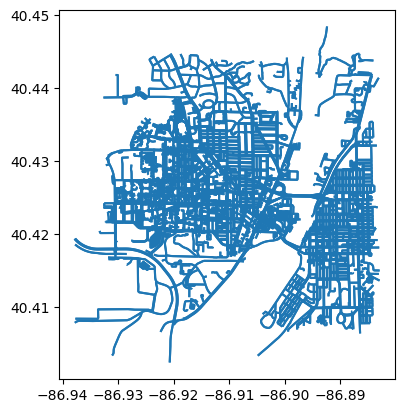

In [24]:
edges.plot()

In [25]:
edges

osmid      highway maxspeed  \
u           v           key                                     
37968547    3059889306  0       5327012  residential   20 mph   
            7515887279  0       5327012  residential   20 mph   
            5795825611  0       5331462  residential   20 mph   
            37968552    0       5331462  residential   20 mph   
37968548    7515887279  0       5327012  residential   20 mph   
...                                 ...          ...      ...   
13115520459 13115520457 0    1426753174      footway      NaN   
13115556306 13115520454 0    1426753174      footway      NaN   
            13115520456 0    1426753175      footway      NaN   
            13115520455 0    1426753175      footway      NaN   
            13115520457 0    1426753174      footway      NaN   

                                          name  oneway reversed     length  \
u           v           key                                                  
37968547    3059889306  0    Agricultural Mall   False    False   6.715528   
            7515887279  0    Agricultural Mall   False     True  77.020779   
            5795825611  0           Hort Drive   False    False  10.110614   
            37968552    0           Hort Drive   False     True  34.863839   
37968548    7515887279  0    Agricultural Mall   False    False   7.587717   
...                                        ...     ...      ...        ...   
13115520459 13115520457 0                  NaN   False     True  10.212836   
13115556306 13115520454 0                  NaN   False     True  36.931987   
            13115520456 0                  NaN   False    False  13.326797   
            13115520455 0                  NaN   False     True  40.169606   
            13115520457 0                  NaN   False    False  11.461475   

                                                                      geometry  \
u           v           key                                                      
37968547    3059889306  0    LINESTRING (-86.915 40.42208, -86.91492 40.42208)   
            7515887279  0     LINESTRING (-86.915 40.42208, -86.91591 40.4221)   
            5795825611  0      LINESTRING (-86.915 40.42208, -86.915 40.42199)   
            37968552    0    LINESTRING (-86.915 40.42208, -86.91498 40.42239)   
37968548    7515887279  0      LINESTRING (-86.916 40.4221, -86.91591 40.4221)   
...                                                                        ...   
13115520459 13115520457 0    LINESTRING (-86.91182 40.42621, -86.91194 40.4...   
13115556306 13115520454 0    LINESTRING (-86.91207 40.42627, -86.91248 40.4...   
            13115520456 0    LINESTRING (-86.91207 40.42627, -86.91194 40.4...   
            13115520455 0    LINESTRING (-86.91207 40.42627, -86.91246 40.4...   
            13115520457 0    LINESTRING (-86.91207 40.42627, -86.91204 40.4...   

                            lanes bridge  ref service junction access width  \
u           v           key                                                   
37968547    3059889306  0     NaN    NaN  NaN     NaN      NaN    NaN   NaN   
            7515887279  0     NaN    NaN  NaN     NaN      NaN    NaN   NaN   
            5795825611  0     NaN    NaN  NaN     NaN      NaN    NaN   NaN   
            37968552    0     NaN    NaN  NaN     NaN      NaN    NaN   NaN   
37968548    7515887279  0     NaN    NaN  NaN     NaN      NaN    NaN   NaN   
...                           ...    ...  ...     ...      ...    ...   ...   
13115520459 13115520457 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN   
13115556306 13115520454 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN   
            13115520456 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN   
            13115520455 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN   
            13115520457 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN   

                            tunnel  
u           v           key         
3796

In [28]:
print(len(edges))

28038


In [27]:
non_highway_edges = edges[
    (edges["highway"] != "primary") &
    (edges["highway"] != "motorway") &
    (edges["highway"] != "trunk") &
    (edges["highway"] != "primary_link") &
    (edges["highway"] != "motorway_link") &
    (edges["highway"] != "trunk_link")
]
non_highway_edges.head(10)

osmid       highway maxspeed  \
u        v          key                                     
37968547 3059889306 0      5327012   residential   20 mph   
         7515887279 0      5327012   residential   20 mph   
         5795825611 0      5331462   residential   20 mph   
         37968552   0      5331462   residential   20 mph   
37968548 7515887279 0      5327012   residential   20 mph   
         8723491254 0      5332001  unclassified   20 mph   
         37968554   0      5332001  unclassified   20 mph   
37968551 38001852   0      5330438   residential   25 mph   
         8726374678 0    895392858   residential   25 mph   
         3061368793 0      5327013   residential   20 mph   

                                            name  oneway reversed     length  \
u        v          key                                                        
37968547 3059889306 0          Agricultural Mall   False    False   6.715528   
         7515887279 0          Agricultural Mall   False     True  77.020779   
         5795825611 0                 Hort Drive   False    False  10.110614   
         37968552   0                 Hort Drive   False     True  34.863839   
37968548 7515887279 0          Agricultural Mall   False    False   7.587717   
         8723491254 0    South University Street   False    False   5.516939   
         37968554   0    South University Street   False     True  35.203030   
37968551 38001852   0          Marsteller Street   False    False  34.439416   
         8726374678 0          Marsteller Street   False     True   5.626879   
         3061368793 0          Agricultural Mall   False    False   7.021851   

                                                                  geometry  \
u        v          key                                                      
37968547 3059889306 0    LINESTRING (-86.915 40.42208, -86.91492 40.42208)   
         7515887279 0     LINESTRING (-86.915 40.42208, -86.91591 40.4221)   
         5795825611 0      LINESTRING (-86.915 40.42208, -86.915 40.42199)   
         37968552   0    LINESTRING (-86.915 40.42208, -86.91498 40.42239)   
37968548 7515887279 0      LINESTRING (-86.916 40.4221, -86.91591 40.4221)   
         8723491254 0       LINESTRING (-86.916 40.4221, -86.916 40.42205)   
         37968554   0    LINESTRING (-86.916 40.4221, -86.91599 40.4222...   
37968551 38001852   0    LINESTRING (-86.91377 40.42236, -86.91378 40.4...   
         8726374678 0    LINESTRING (-86.91377 40.42236, -86.91377 40.4...   
         3061368793 0    LINESTRING (-86.91377 40.42236, -86.91382 40.4...   

                        lanes bridge  ref service junction access width tunnel  
u        v          key                                                         
37968547 3059889306 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         7515887279 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         5795825611 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         37968552   0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
37968548 7515887279 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         8723491254 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         37968554   0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
37968551 38001852   0       2    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         8726374678 0       2    NaN  NaN     NaN      NaN    NaN   NaN    NaN  
         3061368793 0     NaN    NaN  NaN     NaN      NaN    NaN   NaN    NaN

In [ ]:
connected_nodes = pd.Index(non_highway_edges["u"].union(non_highway_edges["v"]))
non_highway_nodes = nodes.loc[connected_nodes]

<Axes: >

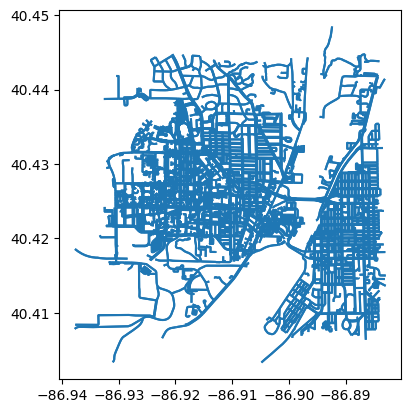

In [30]:
non_highway_edges.plot()

In [29]:
print(len(non_highway_edges))

27420
